In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv("iris_dataset1.csv")

In [3]:

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.65,4.31,6.25,2.00,virginica
1,7.72,2.60,2.99,2.00,versicolor
2,6.94,3.19,3.22,0.32,versicolor
3,6.46,2.72,1.55,1.29,versicolor
4,4.86,2.68,4.41,0.24,virginica
...,...,...,...,...,...
135,5.46,3.20,3.65,1.07,setosa
136,6.17,3.92,2.73,0.42,setosa
137,6.83,3.56,2.94,0.17,setosa
138,5.61,3.68,4.97,1.91,virginica


In [4]:
# how to check column having values 
df["species"].unique()

array(['virginica', 'versicolor', 'setosa'], dtype=object)

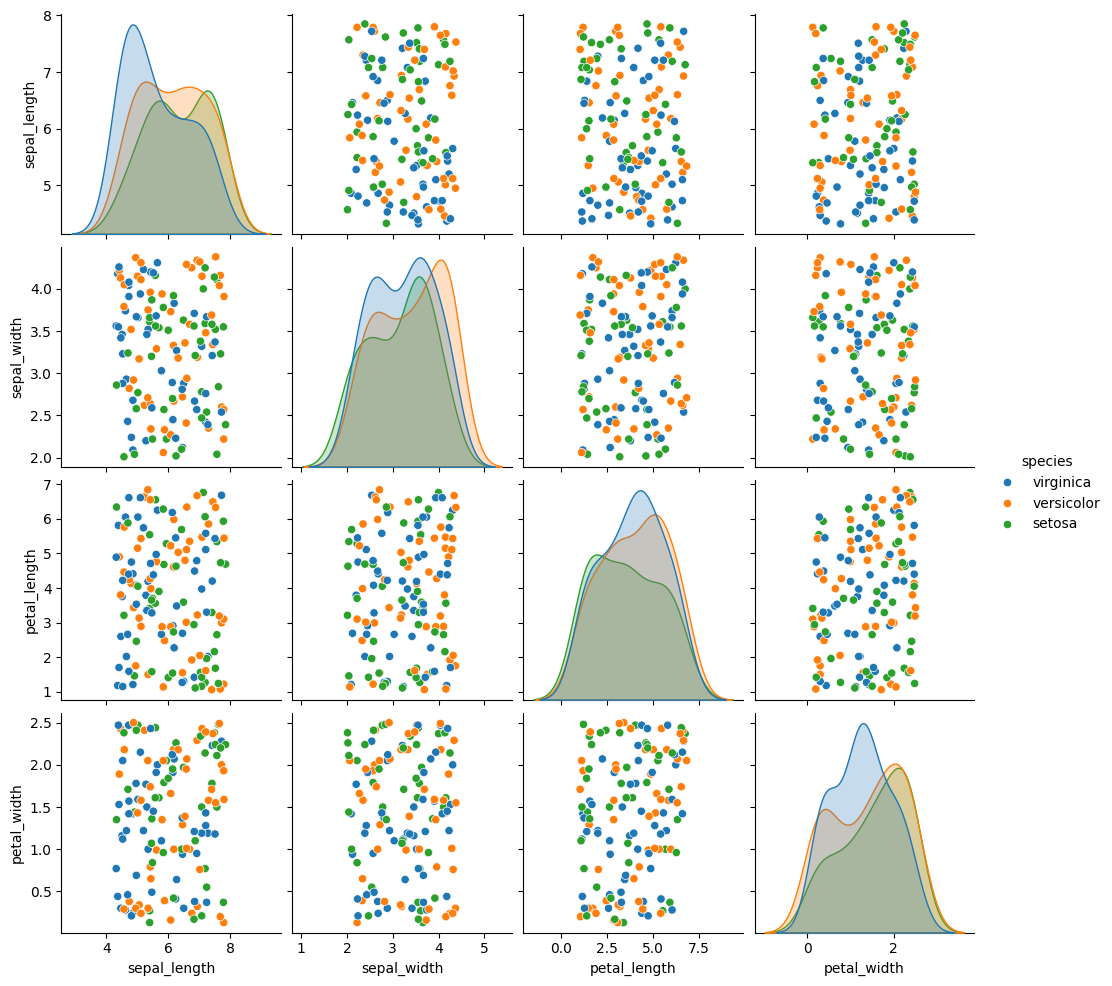

In [11]:
sns.pairplot(data=df,hue="species")
plt.savefig("pairplotmulticlassReg.jpg")
plt.show()

# which feature is selected 
# A good feature for classification will have distinct peaks for different classes, meaning they do not overlap much.
 # A poor feature will have overlapping density curves, meaning it does not provide much class separation.
# Feature Selection Strategy
# Select features with distinct density distributions (less overlap).
# Choose feature pairs that show clear class separation in scatter plots.
# Avoid highly correlated features (redundancy) unless necessary.




In [23]:
x=df.iloc[:,:-1]
y=df[["species"]]

In [24]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# OVR (One vs Rest)

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class="ovr")


In [30]:
lr.fit(x_train,y_train)

C:\Users\ansar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ansar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [32]:
print("accuracy of model ::",lr.score(x_test,y_test)*100)

accuracy of model :: 39.285714285714285


# Softmax function 

In [33]:
lr1=LogisticRegression(multi_class="multinomial")
lr1.fit(x_train,y_train)

C:\Users\ansar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ansar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [34]:
print("accuracy of model ::",lr1.score(x_test,y_test)*100)

accuracy of model :: 35.714285714285715


# in LogisticRegression(multi_class="auto") based on data it can automacialy detect which method apply to data ovr,softmax function accordingly it apply it to model 